In [1]:
import geopandas as geop
from matplotlib import pyplot as plt

In [2]:
import torch
from torch import nn
import torch.nn.functional as F

import numpy as np

import seaborn as sns

In [3]:
raw_data = geop.read_file('./PlanBlocksR5_v2neighbors.shp')

In [4]:
raw_data['Far_2017'].mean()

1.4865835489691301

In [5]:
raw_data.columns

Index(['Block_ID', 'd_tam', 'd_metro', 'd_cbd', 'in_Eco', 'in_Ind', 'in_His',
       'Far_2004', 'Far_2017', 'TAZ_ID', 'Density00', 'Density10', 'Density22',
       'Perc_Res', 'Perc_Job', 'd_zgc', 'Den_road', 'Lng', 'Lat', 'Area_m2',
       'neighbors', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [6]:
from train import init_data, train, predict

In [7]:
init_data()
# train()

In [20]:
predictions, labels = predict('mlp')
predictions = np.array(predictions)
labels = np.array(labels)

0.15761583642963117


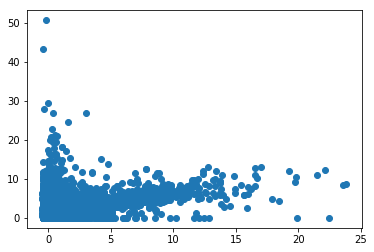

In [21]:
from scipy import stats
r2 = stats.linregress(predictions, labels)[2]** 2
print(r2)
import matplotlib.pyplot as plt

plt.scatter(predictions, labels)

In [22]:
zero_mask = (labels == 0.)
non_zero_mask = 1. - zero_mask
error = labels - predictions
d_error = np.digitize(np.abs(error), np.arange(0., 3., .3))

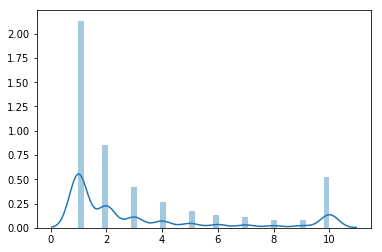

In [29]:
sns.distplot(d_error)

In [24]:
np.mean(np.abs(error))

1.0193582424622056

In [25]:
(labels == 0).sum()

3728

In [26]:
labels

array([0.        , 0.03142453, 0.        , ..., 0.01199299, 0.07347592,
       0.06811568])

In [27]:
levels = [0., .4, .6, 1., 2.4, 4., 6.]
d_label = np.digitize(labels, levels)
d_preds = np.digitize(predictions, levels)

zero_labels = (labels < 1e-1)

((d_label == d_preds) * zero_labels).sum() / zero_labels.sum()


0.5766497461928934

分级标准来源 [容积率](http://www.360doc.com/content/12/1209/12/8035339_252999727.shtml)

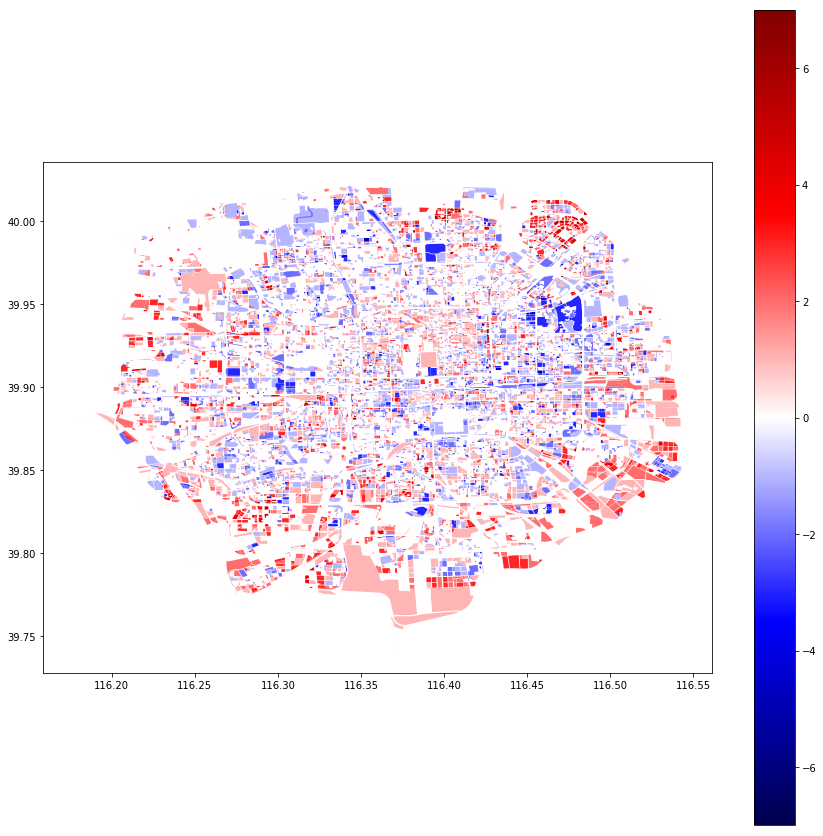

In [18]:

prediction_df = geop.GeoDataFrame((d_label - d_preds))
prediction_df.rename(columns={0:'error'}, inplace=True)

new_df = raw_data.join(prediction_df)

# new_df.plot(column='error', vmin=1, vmax=d_error.max(), figsize=(15, 15), legend=True, cmap='plasma')
new_df.plot(column='error', vmin=-7, vmax=7, figsize=(15, 15), legend=True, cmap='seismic')

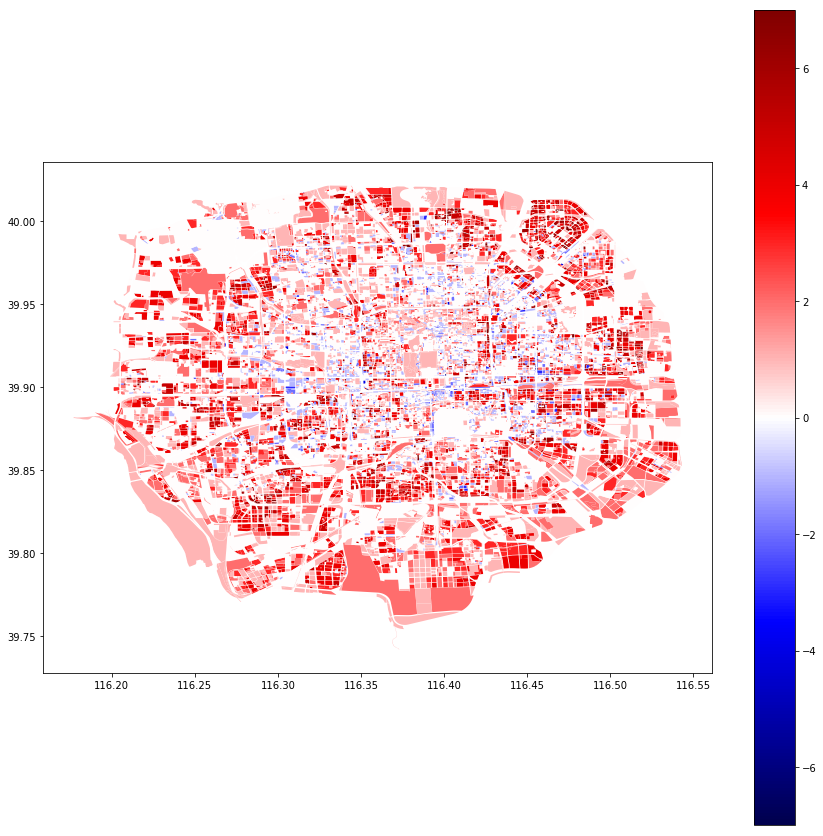

In [28]:

prediction_df = geop.GeoDataFrame((d_label - d_preds))
prediction_df.rename(columns={0:'error'}, inplace=True)

new_df = raw_data.join(prediction_df)

# new_df.plot(column='error', vmin=1, vmax=d_error.max(), figsize=(15, 15), legend=True, cmap='plasma')
new_df.plot(column='error', vmin=-7, vmax=7, figsize=(15, 15), legend=True, cmap='seismic')